In [1]:
# Importing necessary libraries

# importing numpy library
import numpy as np

# importing pandas library
import pandas as pd

# importing matplotlib library
import matplotlib.pyplot as plt

# importing seaborn library
import seaborn as sns

%matplotlib inline

### Reading data to Python Dataframe

In [6]:
# Loading loan data into dataframe loan_df
loan_df = pd.read_csv("loan.csv", encoding = "ISO-8859-1")

loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
# Checking uniqueness of all the columns
clms = []
for x in loan_df.columns.tolist():
    if len(loan_df[x].unique()) == len(loan_df[x]):
        clms.append(x)
    else:
        pass
        
print("List of unique value columns: {}".format(clms))
    

List of unique value columns: ['id', 'member_id', 'url']


In [8]:
# Removing Unique value column
loan_df = loan_df.drop(clms, axis=1)

In [9]:
#Checking if there is any whitespace before and after the column-names
no_col_space = 0
for x in loan_df.columns.tolist():
    if x[0] == " " or x[-1] == " ":
        print(x)
        no_col_space += 1 
        
print("Total number of columns with white space at the begining or end of column-name: {}".format(no_col_space))

Total number of columns with white space at the begining or end of column-name: 0


# Data Cleaning

### Checking percentage of missing values

In [10]:
# Checking percentage of missing values in each column
round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)

loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti                                 0.00
delinq_2yrs                         0.00
earliest_cr_line                    0.00
inq_last_6mths  

### Removing all columns with very high missing percentage.

In [11]:
# Deleting columns with 70% missing values
for y in loan_df.columns:
    if round(100*(loan_df[y].isnull().sum()/len(loan_df.index)), 2) > 70.00:
        loan_df = loan_df.drop(y, axis=1)  

In [12]:
# As per the domain knowledge we are deleting unwanted columns and rows which is not necessary in the analysis
loan_df = loan_df[["loan_amnt","funded_amnt", "funded_amnt_inv", "term", "int_rate", "grade", "sub_grade", "emp_length", "home_ownership", "annual_inc", "verification_status", "loan_status", "purpose", "dti"]]
loan_df = loan_df[(loan_df["loan_status"] != "Current")]
loan_df.head(15)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti
0,5000,5000,4975.0,36 months,10.65%,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,27.65
1,2500,2500,2500.0,60 months,15.27%,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,1.00
2,2400,2400,2400.0,36 months,15.96%,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72
3,10000,10000,10000.0,36 months,13.49%,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,20.00
5,5000,5000,5000.0,36 months,7.90%,A,A4,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,11.20
6,7000,7000,7000.0,60 months,15.96%,C,C5,8 years,RENT,47004.0,Not Verified,Fully Paid,debt_consolidation,23.51
7,3000,3000,3000.0,36 months,18.64%,E,E1,9 years,RENT,48000.0,Source Verified,Fully Paid,car,5.35
8,5600,5600,5600.0,60 months,21.28%,F,F2,4 years,OWN,40000.0,Source Verified,Charged Off,small_business,5.55
9,5375,5375,5350.0,60 months,12.69%,B,B5,< 1 year,RENT,15000.0,Verified,Charged Off,other,18.08
10,6500,6500,6500.0,60 months,14.65%,C,C3,5 years,OWN,72000.0,Not Verified,Fully Paid,debt_consolidation,16.12


In [13]:
# Checking percentage of missing values in each column
round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)

loan_amnt              0.00
funded_amnt            0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
grade                  0.00
sub_grade              0.00
emp_length             2.68
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
loan_status            0.00
purpose                0.00
dti                    0.00
dtype: float64

### Identifying metric to impute the column

In [14]:
# Checking values of column "emp_length"
loan_df["emp_length"].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [15]:
# Imputing missing values of colum "emp_length" with mode value 10+ years
loan_df.loc[pd.isnull(loan_df['emp_length']), ['emp_length']] = "10+ years"

# Checking percentage of missing values in each column
round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)

loan_amnt              0.0
funded_amnt            0.0
funded_amnt_inv        0.0
term                   0.0
int_rate               0.0
grade                  0.0
sub_grade              0.0
emp_length             0.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
loan_status            0.0
purpose                0.0
dti                    0.0
dtype: float64

In [16]:
# finding if there is any empty cell in dataframe
result = loan_df.empty 
print("There is an empty cell in the dataframe: {}".format(result)) 

There is an empty cell in the dataframe: False


### Identifying outliers 

In [17]:
# Checking outliers of column "annual_inc"
loan_df["annual_inc"].describe(percentiles = [0.10, 0.25,0.5,0.75,0.9,0.95,0.97,0.99])

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
10%      3.000000e+04
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
90%      1.150000e+05
95%      1.400040e+05
97%      1.650000e+05
99%      2.341440e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

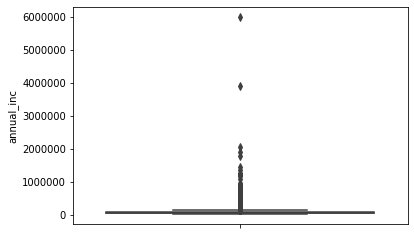

In [18]:
# Checking outliers of column "annual_inc"
sns.boxplot(y=loan_df["annual_inc"])

In [19]:
# Removing outliers of column "annual_inc"
loan_df = loan_df[loan_df["annual_inc"] <= loan_df["annual_inc"].quantile(0.95)] 

### Checking datatypes of columns

In [20]:
# checking datatypes of columns
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36654 entries, 0 to 39716
Data columns (total 14 columns):
loan_amnt              36654 non-null int64
funded_amnt            36654 non-null int64
funded_amnt_inv        36654 non-null float64
term                   36654 non-null object
int_rate               36654 non-null object
grade                  36654 non-null object
sub_grade              36654 non-null object
emp_length             36654 non-null object
home_ownership         36654 non-null object
annual_inc             36654 non-null float64
verification_status    36654 non-null object
loan_status            36654 non-null object
purpose                36654 non-null object
dti                    36654 non-null float64
dtypes: float64(3), int64(2), object(9)
memory usage: 4.2+ MB


### Extracting numerical data from columns and correcting datatype of column

In [21]:
# Deriving Type Driven Matric: emp_experience(Years of Experience) from emp_length
loan_df["emp_experience"] = loan_df["emp_length"].apply(lambda z : "0" if str(z)[0] == "<" else str(z).rstrip("+ years") if str(z)[2] == "+" else str(z).rstrip(" years"))

# converting datatype of emp_length to int64
loan_df["emp_experience"] = pd.to_numeric(loan_df["emp_experience"])

In [22]:
# Deriving Type Driven Matric: int_rate_%(Interest rate in percentage) from int_rate and converting datatype of int_rate to int64
loan_df["int_rate_%"] = loan_df["int_rate"].apply(lambda x : str(x).rstrip("%"))

# converting datatype of emp_length to int64
loan_df["int_rate_%"] = pd.to_numeric(loan_df["int_rate_%"])

In [23]:
# Deriving Business Driven Matric: grade_num(Grade Number) from grade
loan_df["grade_num"] = loan_df["grade"].apply(lambda y : 1 if (str(y) == "A") else 2 if (str(y) == "B") else 3 if (str(y) == "C") else 4 if (str(y) == "D") else 5 if (str(y) == "E") else 6 if (str(y) == "F") else 7)

In [24]:
# Deriving Business Driven Matric: loan_status_mark(Loan status marking in number of 0 or 1) from grade. 1 for Charged Off and 0 for Fully Paid
loan_df["loan_status_mark"] = loan_df["loan_status"].apply(lambda x : 1 if str(x) == "Charged Off" else 0)

In [25]:
# checking datatypes of columns
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36654 entries, 0 to 39716
Data columns (total 18 columns):
loan_amnt              36654 non-null int64
funded_amnt            36654 non-null int64
funded_amnt_inv        36654 non-null float64
term                   36654 non-null object
int_rate               36654 non-null object
grade                  36654 non-null object
sub_grade              36654 non-null object
emp_length             36654 non-null object
home_ownership         36654 non-null object
annual_inc             36654 non-null float64
verification_status    36654 non-null object
loan_status            36654 non-null object
purpose                36654 non-null object
dti                    36654 non-null float64
emp_experience         36654 non-null int64
int_rate_%             36654 non-null float64
grade_num              36654 non-null int64
loan_status_mark       36654 non-null int64
dtypes: float64(4), int64(5), object(9)
memory usage: 5.3+ MB


In [26]:
# Deriving Data Driven Martic: save_after_debt from dti & annual_inc
# dti is a ratio of the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
# save_after_debt is the amount borrower save per month after deducting total monthly debt payments from income, excluding mortgage and the requested LC loan)
loan_df["save_income"] = round((((100 - loan_df["dti"]) * (loan_df["annual_inc"] / 12)) / 100), 2)

In [27]:
# Checking derived columns
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,emp_experience,int_rate_%,grade_num,loan_status_mark,save_income
0,5000,5000,4975.0,36 months,10.65%,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,10,10.65,2,0,1447.00
1,2500,2500,2500.0,60 months,15.27%,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,1.00,0,15.27,3,1,2475.00
2,2400,2400,2400.0,36 months,15.96%,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,10,15.96,3,0,931.97
3,10000,10000,10000.0,36 months,13.49%,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,20.00,10,13.49,3,0,3280.00
5,5000,5000,5000.0,36 months,7.90%,A,A4,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,11.20,3,7.90,1,0,2664.00


### Converting continues variables to categorical variables

In [28]:
# Deriving Type Driven Matric: funded_amnt_inv_cat(Funded Amount By Investor Category) from funded_amnt_inv
loan_df["funded_amnt_inv_cat"] = loan_df["funded_amnt_inv"].apply(lambda a : "< 5000" if a < 5000 else "5000 - 10000" if 5000 <= a < 10000 else "10000 - 15000" if 10000 <= a < 15000 else "15000 - 20000" if 15000 <= a < 20000 else "20000 - 25000" if 20000 <= a < 25000 else "25000 - 30000" if 25000 <= a < 30000 else "30000 - 35000" if 30000 <= a < 35000 else "35000 - 40000" if 35000 <= a < 40000 else ">= 40000")

In [29]:
# Deriving Type Driven Matric: annual_inc_cat(Annual Income Category) from annual_inc
loan_df["annual_inc_cat"] = loan_df["annual_inc"].apply(lambda a : "< 20000" if a < 20000 else "20000 - 40000" if 20000 <= a < 40000 else "40000 - 60000" if 40000 <= a < 60000 else "60000 - 80000" if 60000 <= a < 80000 else "80000 - 100000" if 80000 <= a < 100000 else "100000 - 130000" if 100000 <= a < 130000 else "130000 - 160000" if 130000 <= a < 160000 else "160000 - 190000" if 160000 <= a < 190000 else "190000 - 220000" if 190000 <= a < 220000 else "220000 - 260000" if 220000 <= a < 260000 else "260000 - 300000" if 260000 <= a < 300000 else "300000 - 350000" if 300000 <= a < 350000 else ">= 350000")

In [30]:
# Deriving Type Driven Matric: int_rate_cat(Interest rate category) from int_rate_%
loan_df["int_rate_cat"] = loan_df["int_rate_%"].apply(lambda a : "5 - 10" if 5 <= a < 10 else "10 - 15" if 10 <= a < 15 else "15 - 20" if 15 <= a < 20 else "20 - 25" if 20 <= 25 else "> 25")

In [31]:
# Deriving Type Driven Matric: dti_cat(debt to income category) from dti
# dti is a ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
loan_df["dti_cat"] = loan_df["dti"].apply(lambda a : "< 5" if a < 5 else "5 - 10" if 5 <= a < 10 else "10 - 15" if 10 <= a < 15 else "15 - 20" if 15 <= 20 else "20 - 25" if 20 <= 25 else "25 - 30" if 25 <= 30 else "> 30")

In [32]:
# Deriving Type Driven Matric: save_income_cat(save_income Category) from save_income
loan_df["save_income_cat"] = loan_df["save_income"].apply(lambda a : "< 2000" if a < 2000 else "2000 - 4000" if 2000 <= a < 4000 else "4000 - 6000" if 4000 <= a < 6000 else "6000 - 8000" if 6000 <= a < 8000 else "8000 - 10000" if 8000 <= a < 10000 else "10000 - 12000" if 10000 <= a < 12000 else "> 12000")

In [33]:
# Checking derived columns
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,...,emp_experience,int_rate_%,grade_num,loan_status_mark,save_income,funded_amnt_inv_cat,annual_inc_cat,int_rate_cat,dti_cat,save_income_cat
0,5000,5000,4975.0,36 months,10.65%,B,B2,10+ years,RENT,24000.0,...,10,10.65,2,0,1447.00,< 5000,20000 - 40000,10 - 15,15 - 20,< 2000
1,2500,2500,2500.0,60 months,15.27%,C,C4,< 1 year,RENT,30000.0,...,0,15.27,3,1,2475.00,< 5000,20000 - 40000,15 - 20,< 5,2000 - 4000
2,2400,2400,2400.0,36 months,15.96%,C,C5,10+ years,RENT,12252.0,...,10,15.96,3,0,931.97,< 5000,< 20000,15 - 20,5 - 10,< 2000
3,10000,10000,10000.0,36 months,13.49%,C,C1,10+ years,RENT,49200.0,...,10,13.49,3,0,3280.00,10000 - 15000,40000 - 60000,10 - 15,15 - 20,2000 - 4000
5,5000,5000,5000.0,36 months,7.90%,A,A4,3 years,RENT,36000.0,...,3,7.90,1,0,2664.00,5000 - 10000,20000 - 40000,5 - 10,10 - 15,2000 - 4000


According to above dataframe, we derived 7 Type Driven and 2 Business Driven, 1 Data Driven variables.

# Data Analysis

### Identifying target columns
### Univariate Analysis

In [34]:
# creating function to generate the default rates of values of variables
def default_rate(variable):
    print("List of default rate of values of variable {}: ".format(variable))
    for x in loan_df[variable].unique():
        print(x, end=": ")
        print(round(100*(len(loan_df[(loan_df["loan_status_mark"] == 1) & (loan_df[variable] == x)])/len(loan_df[loan_df["loan_status_mark"] == 1])), 2))

(Text(0.5, 0, 'Grade'), Text(0, 0.5, 'Frequency'))

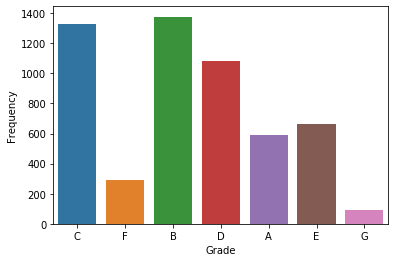

In [35]:
# Univariate Analysis on column "grade" with defaulter rate
sns.countplot(x="grade", data=loan_df[loan_df["loan_status_mark"] == 1])
plt.xlabel("Grade"), plt.ylabel("Frequency")

In [36]:
# Checking default rates of variable "grade"
default_rate("grade")

List of default rate of values of variable grade: 
B: 25.4
C: 24.46
A: 10.94
E: 12.18
F: 5.33
D: 19.93
G: 1.75


#### According to above plot & default rate, grade variable influence the tendency of default.
#### Highest defaulter-rate is 25.4% for Grade B and 24.46% for Grade C.

(Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Sub Grade'))

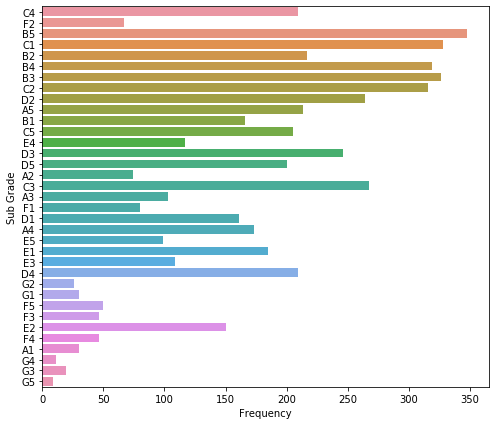

In [37]:
# Univariate Analysis on column "sub_grade" with defaulter rate
plt.figure(figsize=(8, 7))
sns.countplot(y="sub_grade", data=loan_df[loan_df["loan_status_mark"] == 1])
plt.xlabel("Frequency"), plt.ylabel("Sub Grade")

In [38]:
# Checking default rates of variable "sub_grade"
default_rate("sub_grade")

List of default rate of values of variable sub_grade: 
B2: 4.01
C4: 3.86
C5: 3.78
C1: 6.05
A4: 3.19
E1: 3.41
F2: 1.24
B5: 6.42
C3: 4.93
B1: 3.06
D1: 2.97
A1: 0.55
B3: 6.02
B4: 5.89
C2: 5.83
D2: 4.87
A3: 1.9
A5: 3.93
D5: 3.69
A2: 1.37
E4: 2.16
D3: 4.54
D4: 3.86
F3: 0.85
E3: 2.01
F1: 1.48
E5: 1.83
G4: 0.2
E2: 2.77
G2: 0.48
G1: 0.55
F5: 0.92
F4: 0.85
G5: 0.17
G3: 0.35


#### According to above plot & default rate, sub_grade variable does not clearly show the influence for tendency of default.

(Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Borrowers Experience'))

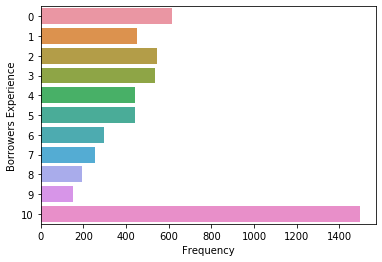

In [39]:
# Univariate Analysis on column "emp_experience" with defaulter rate
sns.countplot(y="emp_experience", data=loan_df[loan_df["loan_status_mark"] == 1])
plt.xlabel("Frequency"), plt.ylabel("Borrowers Experience")

In [40]:
# Checking default rates of variable "emp_experience"
default_rate("emp_experience")

List of default rate of values of variable emp_experience: 
10: 27.59
0: 11.39
3: 9.89
8: 3.58
9: 2.77
4: 8.18
5: 8.14
1: 8.29
6: 5.43
2: 10.1
7: 4.65


#### According to above plot & default rate, emp_length variable influence the tendency of default.
#### Highest defaulter-rate is 27.59% for 10+ years of experience of borrower.

(Text(0.5, 0, 'Home Ownership'), Text(0, 0.5, 'Frequency'))

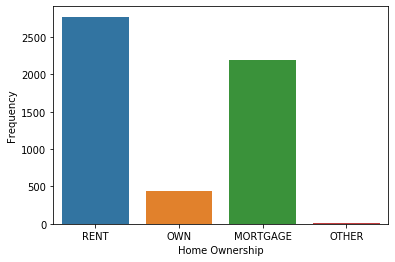

In [41]:
# Univariate Analysis on column "home_ownership" with defaulter rate
sns.countplot(x="home_ownership", data=loan_df[loan_df["loan_status_mark"] == 1])
plt.xlabel("Home Ownership"), plt.ylabel("Frequency")

In [42]:
# Checking default rates of variable "home_ownership"
default_rate("home_ownership")

List of default rate of values of variable home_ownership: 
RENT: 51.18
OWN: 8.01
MORTGAGE: 40.49
OTHER: 0.31
NONE: 0.0


#### According to above plot & default rate, home_ownership variable influence the tendency of default.
#### Highest defaulter-rate is 51.18% for Rent type of home ownership and 40.49% for Mortgage type of home ownership.

(Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Pupose of Loan'))

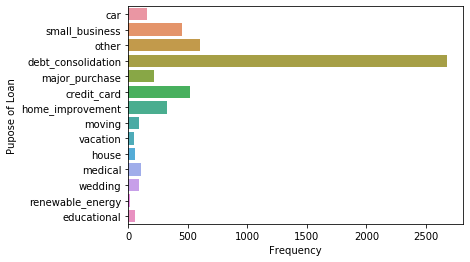

In [43]:
# Univariate Analysis on column "purpose" with defaulter rate
sns.countplot(y="purpose", data=loan_df[loan_df["loan_status_mark"] == 1])
plt.xlabel("Frequency"), plt.ylabel("Pupose of Loan")

In [44]:
# Checking default rates of variable "purpose"
default_rate("purpose")

List of default rate of values of variable purpose: 
credit_card: 9.58
car: 2.93
small_business: 8.38
other: 11.17
wedding: 1.7
debt_consolidation: 49.41
home_improvement: 5.94
major_purchase: 4.01
medical: 1.92
moving: 1.66
vacation: 0.96
house: 1.02
renewable_energy: 0.33
educational: 1.0


#### According to above plot & default rate, purpose variable influence the tendency of default.
#### Highest defaulter-rate is 49.41% for debt consolidation type of Loan-purpose.

(Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Funded Amount by Investor'))

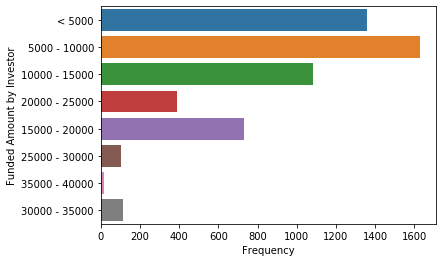

In [45]:
# Univariate Analysis on column "funded_amnt_inv_cat" with defaulter rate
sns.countplot(y="funded_amnt_inv_cat", data=loan_df[loan_df["loan_status_mark"] == 1])
plt.xlabel("Frequency"), plt.ylabel("Funded Amount by Investor")

In [46]:
# Checking default rates of variable "funded_amnt_inv_cat"
default_rate("funded_amnt_inv_cat")

List of default rate of values of variable funded_amnt_inv_cat: 
< 5000: 25.05
10000 - 15000: 19.99
5000 - 10000: 30.05
15000 - 20000: 13.49
20000 - 25000: 7.2
30000 - 35000: 2.09
25000 - 30000: 1.86
35000 - 40000: 0.28


#### According to above plot & default rate, funded_amnt_inv_cat variable influence the tendency of default.
#### Highest defaulter-rate is 30.05% for 5000 to 10000 range of funded amount by investor and 25.05% for lessthan 5000 range of funded amount by investor.

(Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Annual Income of Borrower'))

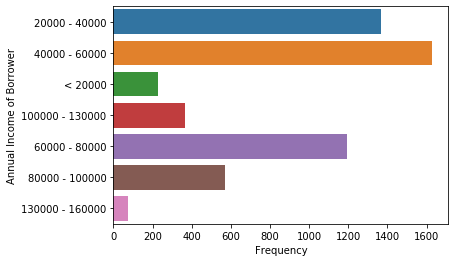

In [47]:
# Univariate Analysis on column "annual_inc_cat" with defaulter rate
sns.countplot(y="annual_inc_cat", data=loan_df[loan_df["loan_status_mark"] == 1])
plt.xlabel("Frequency"), plt.ylabel("Annual Income of Borrower")

In [48]:
# Checking default rates of variable "annual_inc_cat"
default_rate("annual_inc_cat")

List of default rate of values of variable annual_inc_cat: 
20000 - 40000: 25.25
< 20000: 4.19
40000 - 60000: 30.07
60000 - 80000: 21.98
100000 - 130000: 6.7
80000 - 100000: 10.48
130000 - 160000: 1.33


#### According to above plot & default rate, annual_inc_cat variable influence the tendency of default.
#### Highest defaulter-rate is 30.07% for 40000 to 60000 range of annual income and  25.25% for 20000 to 40000 range of annual income of borrower.

(Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Saved Monthly Income of Borrower'))

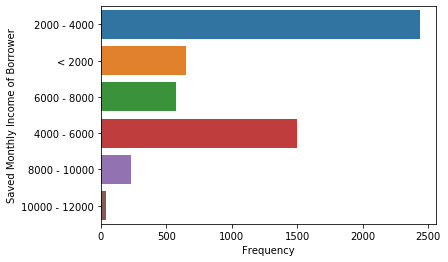

In [49]:
# Univariate Analysis on column "save_income_cat" with defaulter rate
sns.countplot(y="save_income_cat", data=loan_df[loan_df["loan_status_mark"] == 1])
plt.xlabel("Frequency"), plt.ylabel("Saved Monthly Income of Borrower")

In [50]:
# Checking default rates of variable "save_income_cat"
default_rate("save_income_cat")

List of default rate of values of variable save_income_cat: 
< 2000: 11.98
2000 - 4000: 44.94
4000 - 6000: 27.59
6000 - 8000: 10.56
8000 - 10000: 4.23
10000 - 12000: 0.7


#### According to above plot & default rate, save_income_cat variable influence the tendency of default.
#### Highest defaulter-rate is 44.94% for 2000 to 4000 range of saved income(monthly income borrower save after deducting all the debts).

(Text(0.5, 0, 'Debt-to-income ratio'), Text(0, 0.5, 'Frequency'))

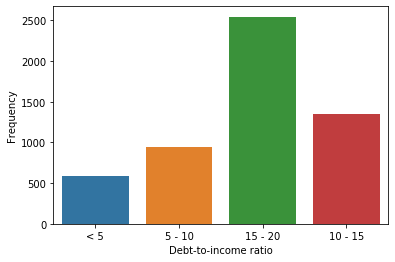

In [51]:
# Univariate Analysis on column "dti_cat" with defaulter rate
sns.countplot(x="dti_cat", data=loan_df[loan_df["loan_status_mark"] == 1])
plt.xlabel("Debt-to-income ratio"), plt.ylabel("Frequency")

In [52]:
# Checking default rates of variable "dti_cat"
default_rate("dti_cat")

List of default rate of values of variable dti_cat: 
15 - 20: 46.95
< 5: 10.85
5 - 10: 17.37
10 - 15: 24.82


#### According to above plot & default rate, dti_cat variable influence the tendency of default.
#### Highest defaulter-rate is 46.95% for 15 to 20 range of debt to income ratio.

(Text(0.5, 0, 'Varification Status of Income'), Text(0, 0.5, 'Frequency'))

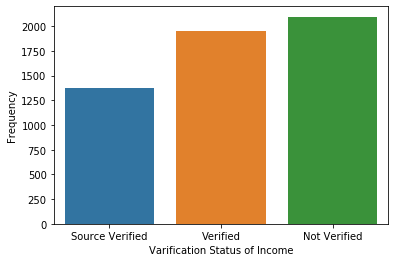

In [53]:
# Univariate Analysis on column "verification_status" with defaulter rate
sns.countplot(x="verification_status", data=loan_df[loan_df["loan_status_mark"] == 1])
plt.xlabel("Varification Status of Income"), plt.ylabel("Frequency")

In [54]:
# Checking default rates of variable "verification_status"
default_rate("verification_status")

List of default rate of values of variable verification_status: 
Verified: 35.97
Source Verified: 25.34
Not Verified: 38.69


#### According to above plot & default rate, verification_status variable does not clearly show infulence for the tendency of default.

(Text(0.5, 0, 'Term'), Text(0, 0.5, 'Frequency'))

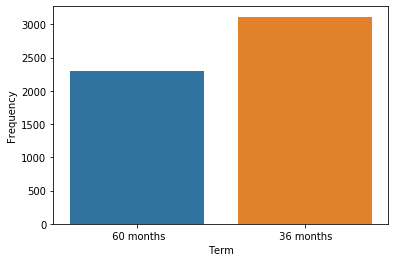

In [55]:
# Univariate Analysis on column "term" with defaulter rate
sns.countplot(x="term", data=loan_df[loan_df["loan_status_mark"] == 1])
plt.xlabel("Term"), plt.ylabel("Frequency")

In [56]:
# Checking default rates of variable "term"
default_rate("term")

List of default rate of values of variable term: 
 36 months: 57.48
 60 months: 42.52


#### According to above plot & default rate, term variable does not clearly show infulence for the tendency of default.

(Text(0.5, 0, 'Interest Rate'), Text(0, 0.5, 'Frequency'))

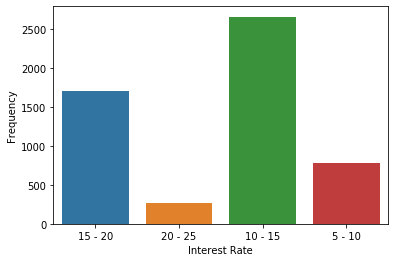

In [57]:
# Univariate Analysis on column "term" with defaulter rate
sns.countplot(x="int_rate_cat", data=loan_df[loan_df["loan_status_mark"] == 1])
plt.xlabel("Interest Rate"), plt.ylabel("Frequency")


In [58]:
# Checking default rates of variable "term"
default_rate("int_rate_cat")

List of default rate of values of variable int_rate_cat: 
10 - 15: 49.13
15 - 20: 31.49
5 - 10: 14.43
20 - 25: 4.95


#### According to above plot & default rate, int_rate_cat_cat variable influence the tendency of default.
#### Highest defaulter-rate is 49.13% for 10 to 15 range of interest ratio.

### Segmented Univariate Analysis

(Text(0.5, 0, 'Grade'), Text(0, 0.5, 'Interest Rate'))

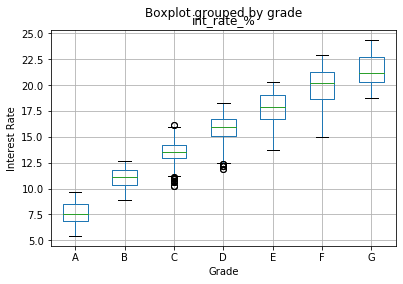

In [59]:
# Segmented Univariate Analysis on column "int_rate_%" and "grade" with defaulter rate
loan_df[loan_df["loan_status_mark"] == 1].boxplot(column='int_rate_%', by='grade')
plt.xlabel("Grade"), plt.ylabel("Interest Rate")

#### Accoding to above plot, worse grade attract higher interest rate.

(Text(0.5, 0, 'Funded Amount by Investor'), Text(0, 0.5, 'Purpose of Loan'))

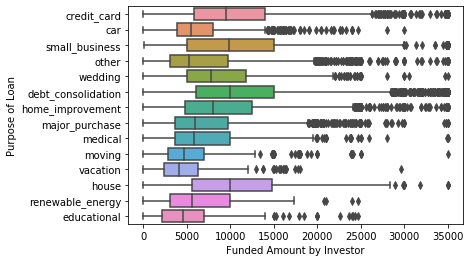

In [60]:
sns.boxplot(y="purpose", x="funded_amnt_inv", data=loan_df)
plt.xlabel("Funded Amount by Investor"), plt.ylabel("Purpose of Loan")

#### Accoding to above plot, most of large amount of funded loans by investors given for the purpose debt consolidation, small business, house repair and credit card payments.

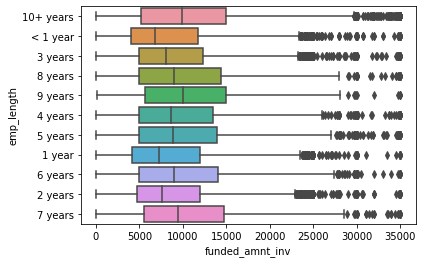

In [62]:
sns.boxplot(y="emp_length", x="funded_amnt_inv", data=loan_df)

# Bivariate Analysis

#### Accoding to above plot, as the borrower's experience increases, amounts of loan increases.

(Text(0.5, 0, 'Purpose of Loan and Debt-to-income ratio'),
 Text(0, 0.5, 'Frequency'))

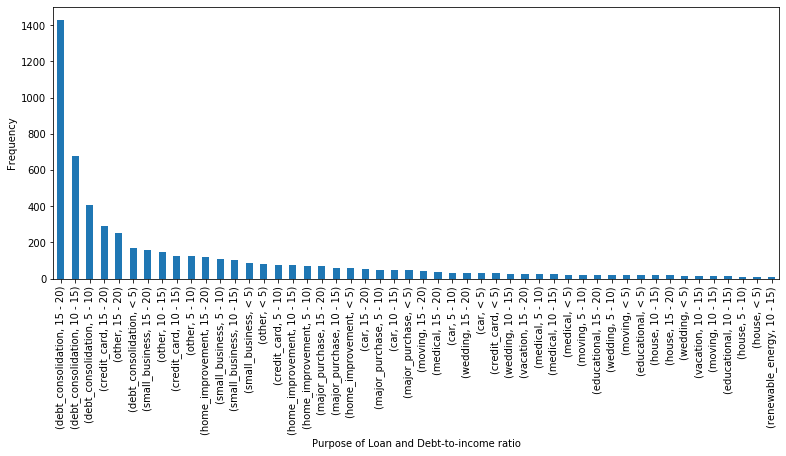

In [63]:
# Bivariate Analysis: grouping by "purpose" & "dti_cat". grp_obj_pd is the groupby object
grp_obj_pd = loan_df[loan_df["loan_status_mark"] == 1].groupby(["purpose", "dti_cat"]).count().copy()
grp_obj_pd.loan_status_mark.sort_values(ascending=False).head(50).plot(kind='bar', figsize=(13, 5))
plt.xlabel("Purpose of Loan and Debt-to-income ratio"), plt.ylabel("Frequency")

#### According to above plot applicants who's debt to income ratio is between 15-20 and purpose is debt consolidation have high chance of being defaulter.

(Text(0.5, 0, 'Funded Amount by Investor and Interest Rate of Loan'),
 Text(0, 0.5, 'Frequency'))

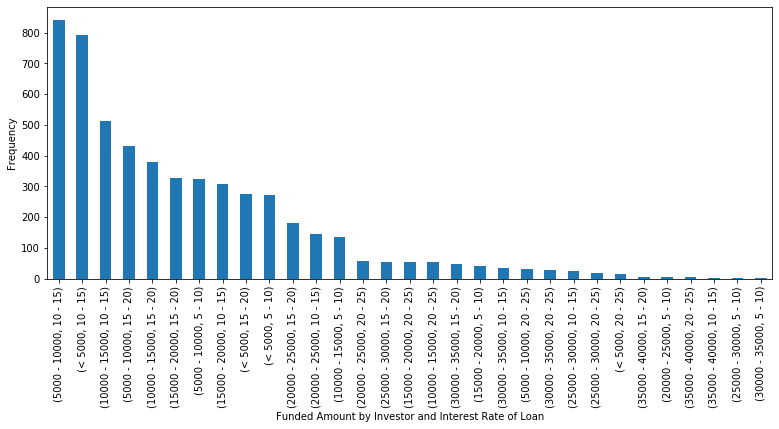

In [64]:
# Bivariate Analysis: grouping by "funded_amnt_inv_cat" & "int_rate_cat". grp_obj_fi is the groupby object
grp_obj_fi = loan_df[loan_df["loan_status_mark"] == 1].groupby(["funded_amnt_inv_cat", "int_rate_cat"]).count().copy()
grp_obj_fi.loan_status_mark.sort_values(ascending=False).head(50).plot(kind='bar', figsize=(13, 5))
plt.xlabel("Funded Amount by Investor and Interest Rate of Loan"), plt.ylabel("Frequency")

#### According to above plot applicants who's investors funded amount is lessthan 10000 and interest rate 10 to 15 have high chance of being defaulter.

(Text(0.5, 0, 'Home Ownership and Purpose of Loan'), Text(0, 0.5, 'Frequency'))

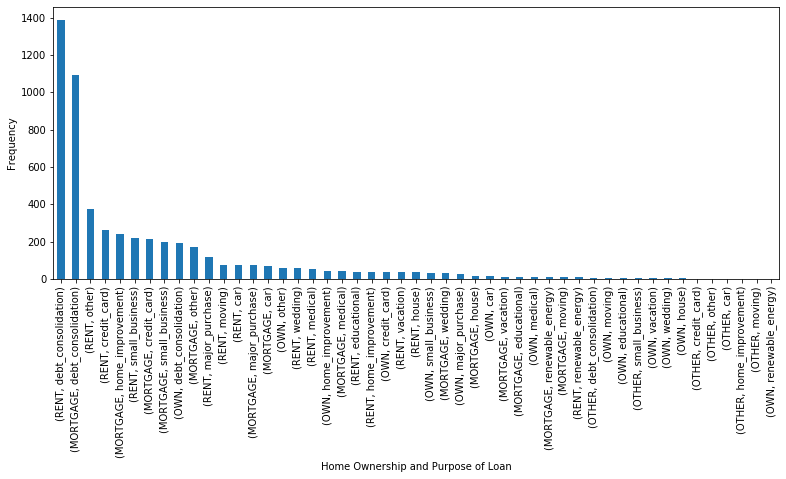

In [65]:
# Bivariate Analysis: grouping by "home_ownership" & "purpose". grp_obj_hp is the groupby object
grp_obj_hp = loan_df[loan_df["loan_status_mark"] == 1].groupby(["home_ownership", "purpose"]).count().copy()
grp_obj_hp.loan_status_mark.sort_values(ascending=False).head(50).plot(kind='bar', figsize=(13, 5))
plt.xlabel("Home Ownership and Purpose of Loan"), plt.ylabel("Frequency")

#### According to above plot applicants who's home ownership is Rent or Mortgage and purpose is debt consolidation have high chance of being defaulter.

(Text(0.5, 0, 'Annual Income of Borrower and Debt-to-Income Ratio'),
 Text(0, 0.5, 'Frequency'))

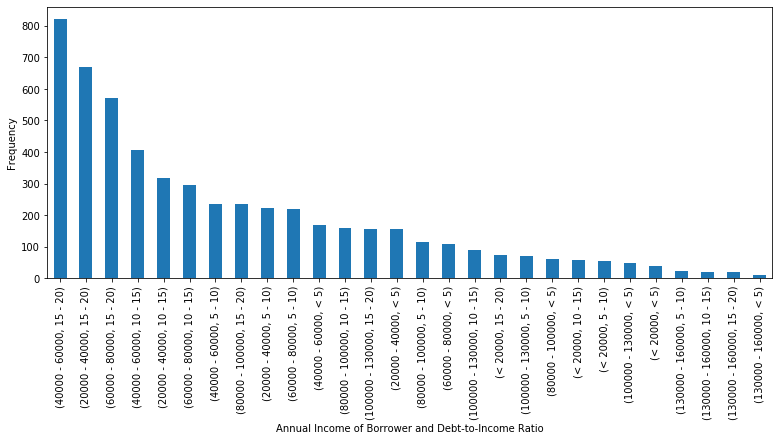

In [67]:
# Bivariate Analysis: grouping by "annual_inc_cat" & "dti_cat". grp_obj_ad is the groupby object
grp_obj_ad = loan_df[loan_df["loan_status_mark"] == 1].groupby(["annual_inc_cat", "dti_cat"]).count().copy()
grp_obj_ad.loan_status_mark.sort_values(ascending=False).head(50).plot(kind='bar', figsize=(13, 5))
plt.xlabel("Annual Income of Borrower and Debt-to-Income Ratio"), plt.ylabel("Frequency")

#### According to above plot applicants who's annual income is 40000 to 60000 and debt to income ratio is 15-20 have high chance of being defaulter.

(Text(0.5, 0, 'Saved monthly income of Borrower and Funded Amount by Investor'),
 Text(0, 0.5, 'Frequency'))

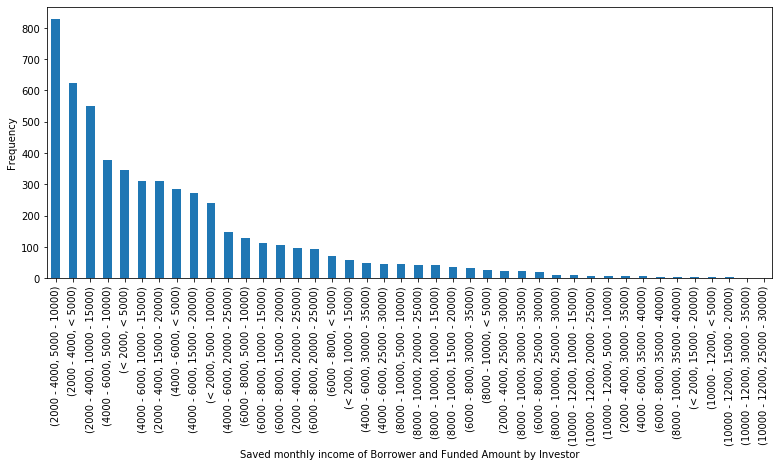

In [68]:
# Bivariate Analysis: grouping by "save_income_cat", "funded_amnt_inv_cat". grp_obj_sf is the groupby object
grp_obj_sf = loan_df[loan_df["loan_status_mark"] == 1].groupby(["save_income_cat", "funded_amnt_inv_cat"]).count().copy()
grp_obj_sf.loan_status_mark.sort_values(ascending=False).head(50).plot(kind='bar', figsize=(13, 5))
plt.xlabel("Saved monthly income of Borrower and Funded Amount by Investor"), plt.ylabel("Frequency")

#### According to above plot applicants who's saved income is 2000 to 4000 and investor's funded amount is 5000 to 10000 have high chance of being defaulter.

(Text(0.5, 0, "Annual Income of Borrower, Borrower's Experience and Home Ownership"),
 Text(0, 0.5, 'Frequency'))

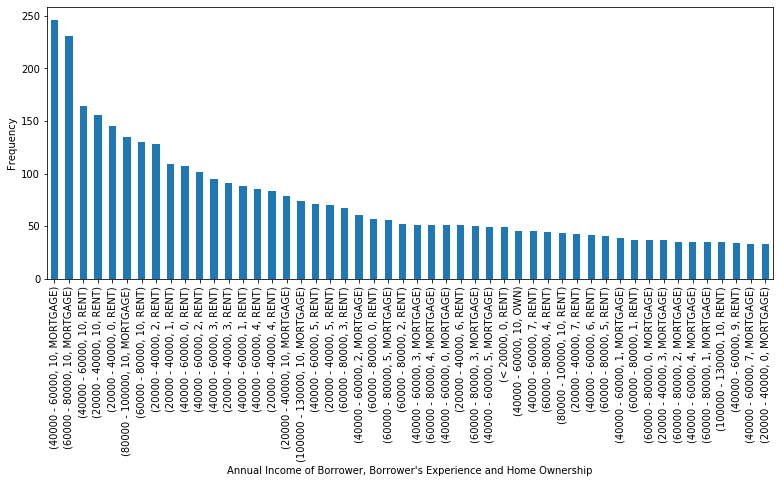

In [70]:
# Bivariate Analysis: grouping by "annual_inc_cat", "emp_experience" and "home_ownership". grp_obj_aeh the groupby object
grp_obj_aeh = loan_df[loan_df["loan_status_mark"] == 1].groupby(["annual_inc_cat", "emp_experience", "home_ownership"]).count().copy()
grp_obj_aeh.loan_status_mark.sort_values(ascending=False).head(50).plot(kind='bar', figsize=(13, 5))
plt.xlabel("Annual Income of Borrower, Borrower's Experience and Home Ownership"), plt.ylabel("Frequency")

#### According to above plot applicants who's annual income is 40000 to 80000, years of experience is 10+ and home ownership is Mortgage have high chance of being defaulter.

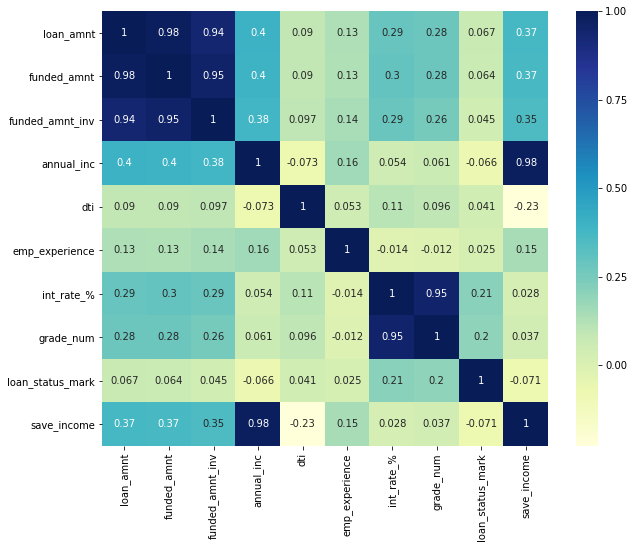

In [71]:
# Bivariate Analysis: creating correlation matrix corr_loan_df and plotting headmap
corr_loan_df = loan_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_loan_df, cmap="YlGnBu", annot=True)

#### According to above heatmap, grade is 95% correlated with interest rate, funded amount is 98% correlated with loan amount, investor's funded amount is 94% correlated with loan amount, funded amount is 95% correlated with investor's funded amount.
#### 'loan amount','funded amount' and 'investor's funded amount' are highly correlated.
#### annual income is 98% correlated with saved monthly income.

# Recommendations

#### As per our analysis, following points recommended to Consumer Finance Company which can reduce the chances of funding a likely defaulter:
 
1. Company should not fund to borrowers who’s debt-to-income ratio is between 15-20 and purpose is debt consolidation
2. Company should not fund to borrowers who’s investor’s funded amount is less than 10000 and interest rate is 10 to 15
3. Company should not fund to borrowers who's home ownership is Rent or Mortgage and purpose is debt consolidation
4. Company should not fund to borrowers who’s annual income is 40000 to 60000 and debt-to-income ratio is 15-20
5. Company should not fund to borrowers who’s saved-monthly-income is 2000 to 4000 and investor's funded amount is 5000 to 10000.
6. Company should not fund to borrowers who’s annual income is 40000 to 80000, years of experience is 10+ and home ownership is Mortgage